In [50]:
using LinearAlgebra
using FFTW
using ToeplitzMatrices
using SpecialMatrices
using Plots

In [151]:
#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.01
b = 7
T = a:δt:b
Y = T.^3 - 5*T.^2 -T
N = length(Y)
L = floor(Int, N/2)
M = 4
##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(pinv(I(N-L-1)Y1))                           #assuming svd transform of a matrix is unique!(but it could be a problem!)
Ze = diagm(s.S)*s.Vt*Y2*s.U
z = eigen(Ze).values
S = log.(z)/δt
zm = z[end-(M-1):end]
#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zm)
vn = ceil(Int, N/M)
V = v
for i in 2:vn
    V = [V diagm(zm).^i*v]
end

Z = V[:, 1:N]
b = Z'\Y
#parameters done!
Ypred = real.(b'*Z)


1×1101 Matrix{Float64}:
 -147.089  -143.533  -140.031  …  87.4254  90.4253  93.4759  87.4254

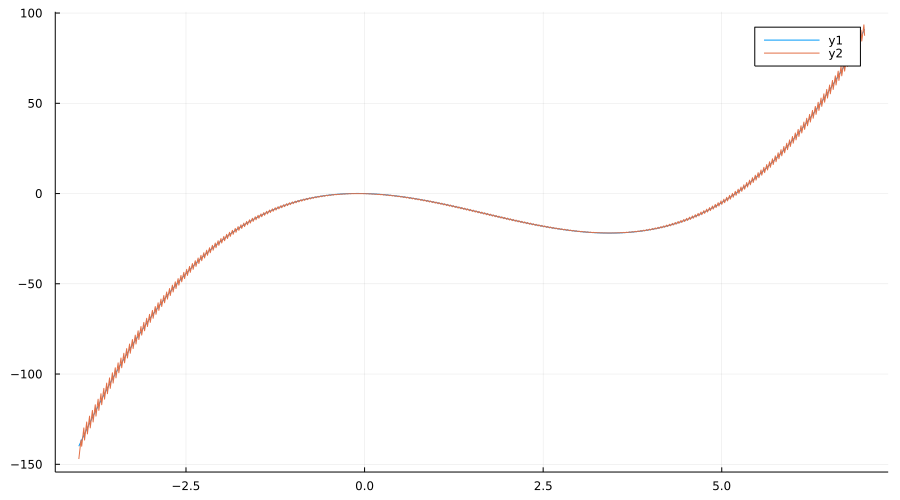

In [152]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [175]:
# test with normal


#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.01
b = 4
T = a:δt:b
Y = 1/√(2π)*exp.(-0.5*T.^2)
N = length(Y)
L = floor(Int, N/2)
M = 6
##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(pinv(I(N-L-1)Y1))                           #assuming svd transform of a matrix is unique!(but it could be a problem!)
Ze = diagm(s.S)*s.Vt*Y2*s.U
z = eigen(Ze).values
S = log.(z)/δt
zm = z[end-(M-1):end]
#building up the rectangular vandermond matrix (it could be a contribution)
v = Vandermonde(zm)
vn = ceil(Int, N/M)
V = v
for i in 2:vn
    V = [V diagm(zm).^i*v]
end

Z = V[:, 1:N]
b = Z'\Y
#parameters done!
Ypred = real.(b'*Z)


1×801 Matrix{Float64}:
 0.128404  0.106462  0.0862896  0.0678329  …  0.0375381  0.0538156  0.0718702

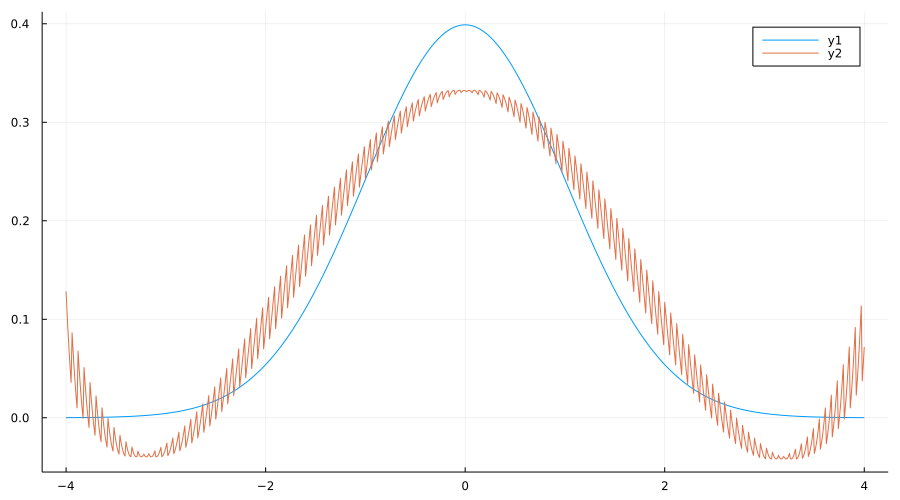

In [176]:
plot(T,[Y Ypred'])
#plot(T,Y)

plot!(size=(900,500))

In [22]:
X = -4.0:0.001:7
Y = X.^3 - 5*X.^2 -X

11001-element Vector{Float64}:
 -140.0
 -139.913016999
 -139.82606799200002
 -139.739152973
 -139.652271936
 -139.56542487500002
 -139.478611784
 -139.391832657
 -139.305087488
 -139.21837627099998
 -139.13169900000003
 -139.045055669
 -138.958446272
    ⋮
   90.165934669
   90.24159900000002
   90.31729527099999
   90.393023488
   90.46878365700005
   90.54457578399999
   90.62039987499998
   90.69625593600001
   90.77214397299996
   90.84806399200004
   90.924015999
   91.0

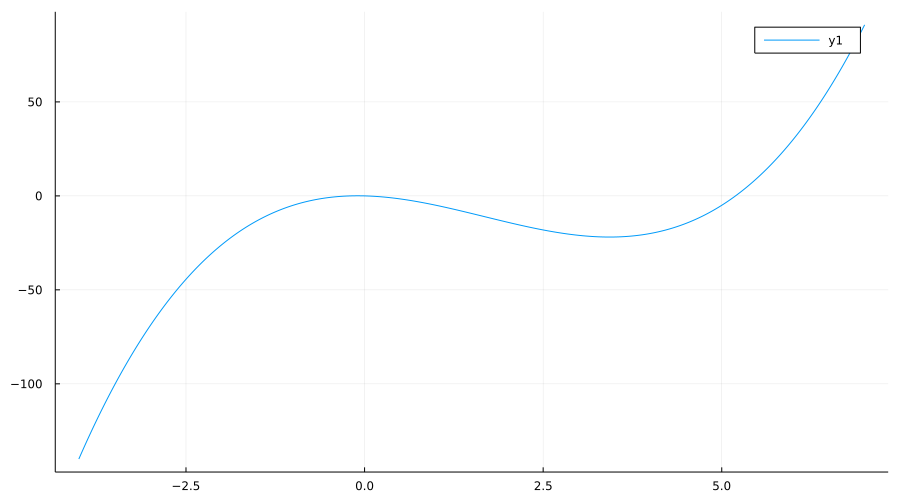

In [23]:
plot(X,Y)
plot!(size=(900,500))

In [162]:
1/√(2π)

0.3989422804014327

In [98]:
a = [1;3;4;6;7;8;9;55]

8-element Vector{Int64}:
  1
  3
  4
  6
  7
  8
  9
 55

In [99]:
v = Vandermonde(a[2:5])

4×4 Vandermonde{Int64}:
 1  3   9   27
 1  4  16   64
 1  6  36  216
 1  7  49  343

In [107]:
A = [v diagm(a[2:5].^4)*v diagm(a[2:5].^8)*v]

4×12 Matrix{Int64}:
 1  3   9   27    81    243     729  …     19683      59049      177147
 1  4  16   64   256   1024    4096       262144    1048576     4194304
 1  6  36  216  1296   7776   46656     10077696   60466176   362797056
 1  7  49  343  2401  16807  117649     40353607  282475249  1977326743

In [109]:
x = A\[7;3;4;2]

12-element Vector{Float64}:
  1.523083714463212e-5
  4.304680727846208e-5
  0.00011890482596739287
  0.0003177377243293897
  0.000808276075729163
  0.0019051323038037416
  0.003956558756005176
  0.006471412084674767
  0.005665616616913173
 -0.004777660854417783
  0.0009621985396836816
 -5.9418415798404726e-5

In [110]:
A*x

4-element Vector{Float64}:
 6.999999999923265
 2.9999999999995737
 4.0
 2.0000000000727596